In [18]:
import numpy as np
import pyFDS
import matplotlib.pyplot as plt
import pyExSi as es

# Random (flat-shaped PSD)

### Import data

In [22]:
fs = 20000 # sampling frequency [Hz]
N = 2*fs # number of data points of time signal

t = np.arange(0,N)/fs # time vector

# define frequency vector and one-sided flat-shaped PSD
M = N//2 + 1 # number of data points of frequency vector
freq_flat = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 100 # PSD lower frequency limit  [Hz]
freq_upper = 2000 # PSD upper frequency limit [Hz]
PSD_flat = es.get_psd(freq_flat, freq_lower, freq_upper) # one-sided flat-shaped PSD

#get gaussian stationary signal
gausian_signal = es.random_gaussian(N, PSD_flat, fs)

In [23]:
PSD_flat

array([0., 0., 0., ..., 0., 0., 0.])

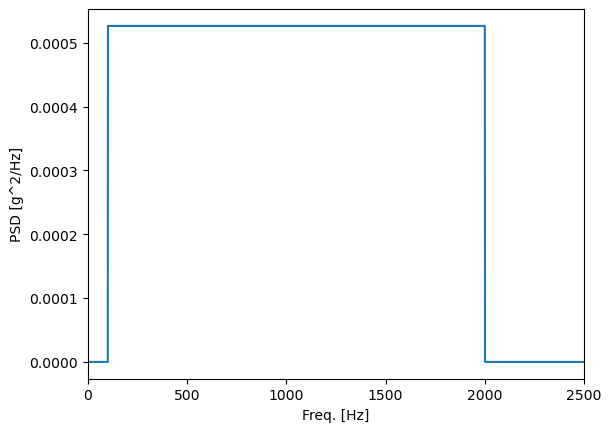

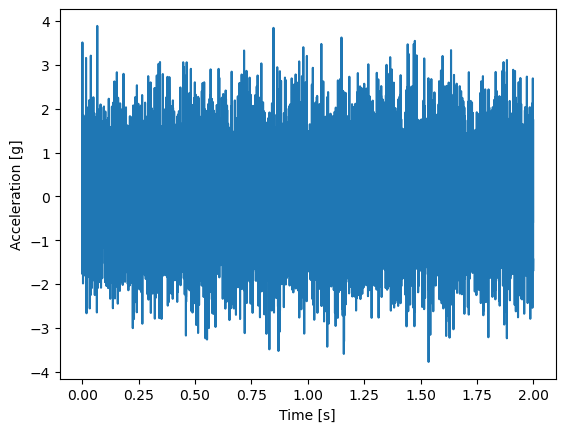

In [24]:
plt.plot(freq_flat, PSD_flat)
plt.xlabel('Freq. [Hz]')
plt.ylabel('PSD [g^2/Hz]')
plt.xlim(0,2500)
plt.show()

plt.plot(t,gausian_signal)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')
plt.show()

## Instantiate Class

In [55]:
sd_flat_psd = pyFDS.SpecificationDevelopment(freq_data=(10,2500,5))
sd_flat_time = pyFDS.SpecificationDevelopment(freq_data=(10,2500,5))
sd_flat_time_2 = pyFDS.SpecificationDevelopment(freq_data=(10,2500,5))

## Set Load

In [78]:
#sd_flat_psd.set_random_load((PSD_flat,freq_flat), unit='g',T=2) #input is tuple (psd array, freq array)
#sd_flat_time.set_random_load((gausian_signal,1/fs), unit='g'method='convolution') #input is tuple (psd array, freq array)
sd_flat_time_2.set_random_load((gausian_signal,1/fs), unit='g',method='psd_averaging',bins=10) #input is tuple (psd array, freq array)

## Get ERS and FDS

In [79]:
# sd_flat_psd.get_ers()
# sd_flat_time.get_ers()
sd_flat_time_2.get_ers()

In [80]:
# sd_flat_psd.get_fds(b=5,C=1,K=1)
# sd_flat_time.get_fds(b=5,C=1,K=1)
sd_flat_time_2.get_fds(b=5,C=1,K=1)

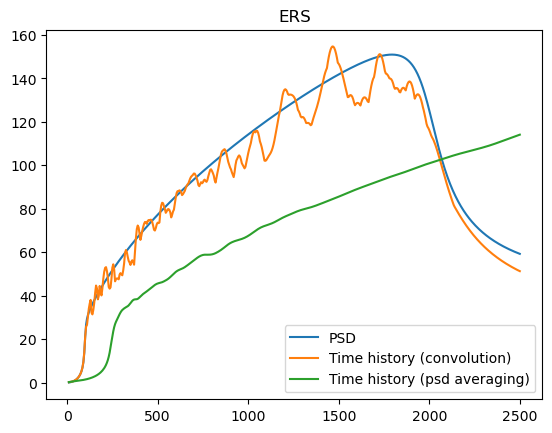

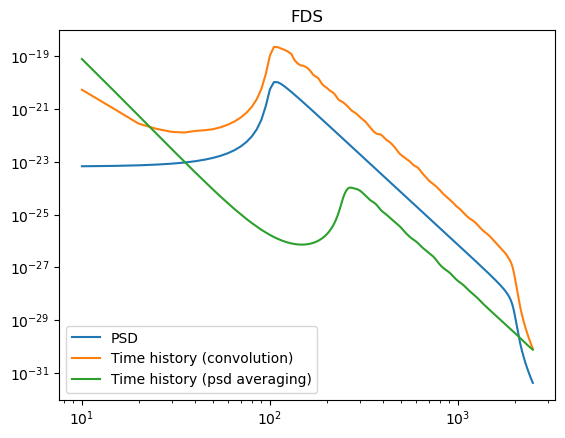

In [81]:
plt.plot(sd_flat_psd.f0_range,sd_flat_psd.ers,label='PSD')
plt.plot(sd_flat_time.f0_range,sd_flat_time.ers,label='Time history (convolution)')
plt.plot(sd_flat_time_2.f0_range,sd_flat_time_2.ers,label='Time history (psd averaging)')
plt.title('ERS')
plt.legend()
plt.show()

plt.loglog(sd_flat_psd.f0_range,sd_flat_psd.fds,label='PSD')
plt.loglog(sd_flat_time.f0_range,sd_flat_time.fds,label='Time history (convolution)')
plt.loglog(sd_flat_time_2.f0_range,sd_flat_time_2.fds,label='Time history (psd averaging)')
plt.title('FDS')
plt.legend()
plt.show()

# Random (Industry standard profile example)

### Import data

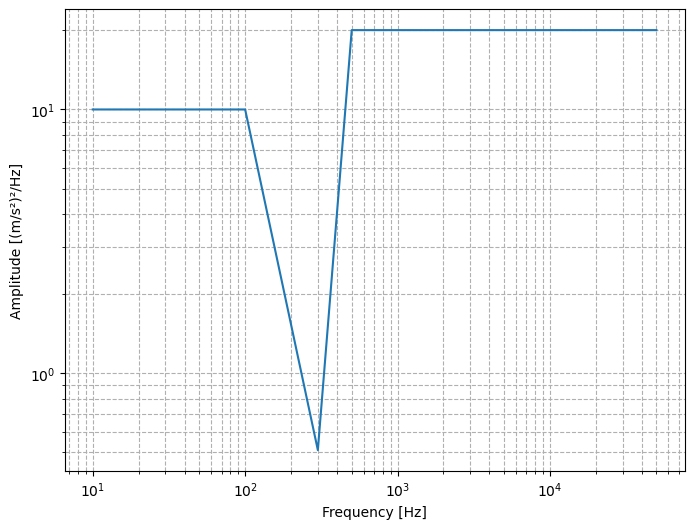

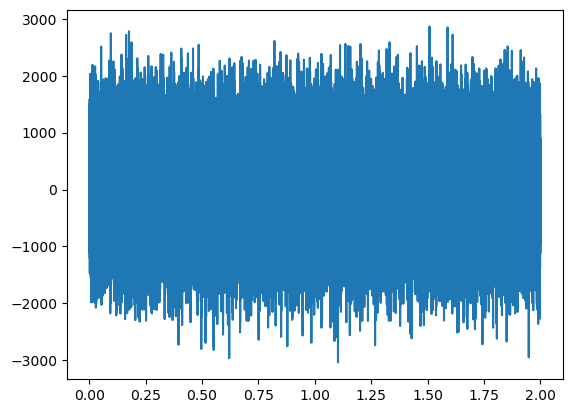

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fs = 50000 # sampling frequency [Hz]
N = 2*fs # number of data points of time signal
t = np.arange(0,N)/fs # time vector

M = N//2 + 1 # number of data points of frequency vector

# Given input table (frequency in Hz and amplitude in (m/s^2)^2/Hz)
freq_input = np.array([10, 100, 300, 500, 2000])
psd_input = np.array([10, 10, 0.51, 20, 20])

# Create the frequency vector with a step of 0.5 Hz
freq_test = np.arange(freq_input[0], M, 0.5)

# Logarithmic interpolation
log_freq_input = np.log10(freq_input)
log_psd_input = np.log10(psd_input)

# Interpolate in log-log space
log_psd_test = np.interp(np.log10(freq_test), log_freq_input, log_psd_input)

# Convert back to linear space
psd_test = 10**log_psd_test

test_time = es.random_gaussian(N, psd_test, fs)

# Plotting the result to verify
plt.figure(figsize=(8,6))
plt.loglog(freq_test, psd_test)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [(m/s²)²/Hz]")
plt.grid(True, which="both", ls="--")
plt.show()

plt.plot(t,test_time)


In [31]:
t[-1]

1.99998

## Instantiate Class

In [40]:
sd_test = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))
sd_test_time = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))
sd_test_time_2 = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))

## Set Load

In [45]:
sd_test.set_random_load((psd_test,freq_test), unit='ms2',T=2) #input is tuple (psd array, freq array)
sd_test_time.set_random_load((test_time,1/fs), unit='ms2') #input is tuple (psd array, freq array)
sd_test_time_2.set_random_load((test_time,1/fs), unit='ms2',method='psd_averaging',bins=500) #input is tuple (psd array, freq array)


## Get ERS and FDS

In [50]:
sd_test.get_ers()
sd_test_time.get_ers()
sd_test_time_2.get_ers()

Calculating extreme response for each SDOF system...
Calculating fatigue damage for each SDOF system...


100%|██████████| 399/399 [00:02<00:00, 168.66it/s]


In [51]:
sd_test.get_fds(b=5,C=1,K=1)
sd_test_time.get_fds(b=5,C=1,K=1)
sd_test_time_2.get_fds(b=5,C=1,K=1)

Calculating extreme response for each SDOF system...
Calculating fatigue damage for each SDOF system...


100%|██████████| 399/399 [00:11<00:00, 33.84it/s]


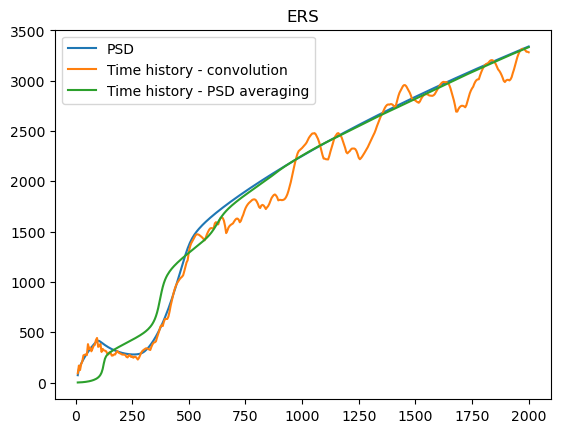

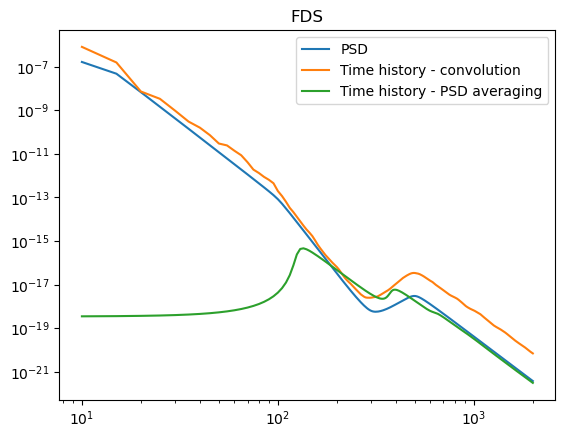

In [52]:
plt.plot(sd_test.f0_range,sd_test.ers,label='PSD')
plt.plot(sd_test_time.f0_range,sd_test_time.ers,label='Time history - convolution')
plt.plot(sd_test_time_2.f0_range,sd_test_time_2.ers,label='Time history - PSD averaging')
plt.title('ERS')
plt.legend()
plt.show()

plt.loglog(sd_test.f0_range,sd_test.fds,label='PSD')
plt.loglog(sd_test_time.f0_range,sd_test_time.fds,label='Time history - convolution')
plt.loglog(sd_test_time_2.f0_range,sd_test_time_2.fds,label='Time history - PSD averaging')
plt.title('FDS')
plt.legend()
plt.show()

# Random (Non stationary-non Gaussian)

### Import data

In [3]:
_psd_data = np.load('test_data/test_psd.npy', allow_pickle=True)
psd_freq = _psd_data[:,0]
psd_data = _psd_data[:,1]

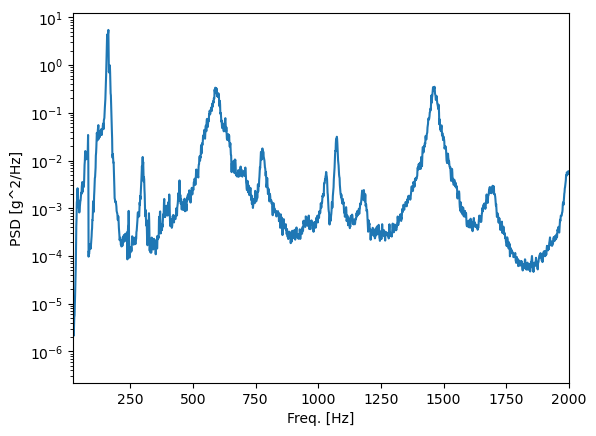

In [4]:
plt.semilogy(psd_freq, psd_data)
plt.xlabel('Freq. [Hz]')
plt.ylabel('PSD [g^2/Hz]')
plt.xlim(20, 2000)
plt.show()

## Instantiate Class

In [5]:
sd3 = pyFDS.SpecificationDevelopment(freq_data=(20,2000,5))

## Set Load

In [6]:
sd3.set_random_load((psd_data,psd_freq), unit='g',T=3600) #input is tuple (psd array, freq array)

## Get ERS and FDS

In [7]:
sd3.get_ers()

In [8]:
sd3.get_fds(b=5,C=1,K=1)

# Random (time history)

In [1]:
import pyFDS
import numpy as np

## Import data

In [47]:
_time_data = np.load('test_data/test_time_history.npy', allow_pickle=True)
time_history_data = _time_data[:,1]
t = _time_data[:,0] 
dt = t[2] - t[1]

Text(0, 0.5, 'Acceleration [g]')

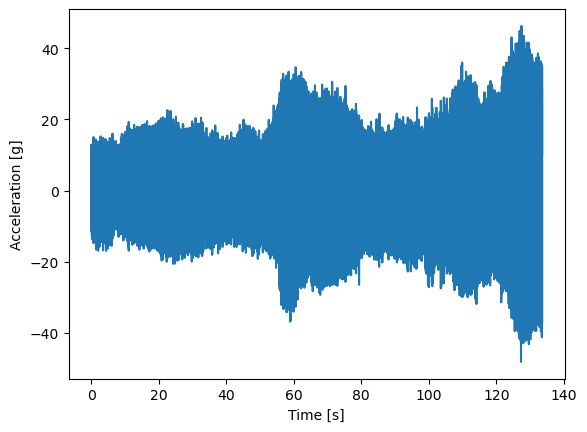

In [48]:
plt.plot(t, time_history_data)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')

## Instantiate class

In [3]:
sd4 = pyFDS.SpecificationDevelopment(freq_data=(20,2000,5)) #convolution

sd5 = pyFDS.SpecificationDevelopment(freq_data=(20,2000,5)) #psd averaging

## Set load

In [4]:
sd4.set_random_load((time_history_data,dt), unit='g') #dt

sd5.set_random_load((time_history_data,dt), unit='g',method='psd_averaging',bins=500) #dt

## Get ERS and FDS

In [5]:
sd4.get_ers()

Calculating extreme response for each SDOF system...
Calculating fatigue damage for each SDOF system...


100%|██████████| 397/397 [00:27<00:00, 14.36it/s]


In [6]:
sd5.get_ers()

In [7]:
sd4.get_fds(b=5,C=1,K=1)

Calculating extreme response for each SDOF system...
Calculating fatigue damage for each SDOF system...


 13%|█▎        | 52/397 [00:22<02:28,  2.32it/s]


In [14]:
sd5.get_fds(b=5,C=1,K=1)

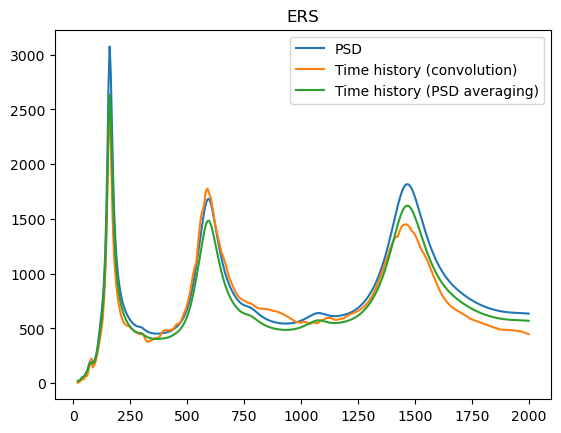

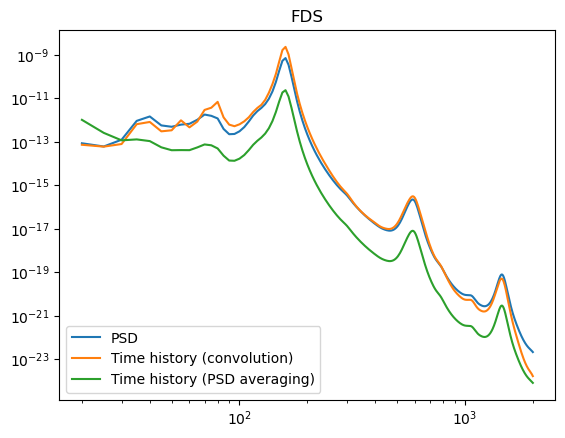

In [15]:
plt.plot(sd3.f0_range,sd3.ers,label='PSD')
plt.plot(sd4.f0_range,sd4.ers,label='Time history (convolution)')
plt.plot(sd5.f0_range,sd5.ers,label='Time history (PSD averaging)')
plt.title('ERS')
plt.legend()
plt.show()

plt.loglog(sd3.f0_range,sd3.fds,label='PSD')
plt.loglog(sd4.f0_range,sd4.fds,label='Time history (convolution)')
plt.loglog(sd5.f0_range,sd5.fds,label='Time history (PSD averaging)')
plt.title('FDS')
plt.legend()

